In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [147]:
df = pd.read_csv("cirrhosis.csv")

In [148]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

**Target Variable is Stage:**
- **Stage 1 : Normal**
- **Stage 2 : Fatty Liver**
- **Stage 3 : Liver Fibrosis**
- **Stage 4 : Liver Cirrhosis**

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [150]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [151]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


In [152]:
(df.isnull().sum()/df.count())*100

ID                0.000000
N_Days            0.000000
Status            0.000000
Drug             33.974359
Age               0.000000
Sex               0.000000
Ascites          33.974359
Hepatomegaly     33.974359
Spiders          33.974359
Edema             0.000000
Bilirubin         0.000000
Cholesterol      47.183099
Albumin           0.000000
Copper           34.838710
Alk_Phos         33.974359
SGOT             33.974359
Tryglicerides    48.226950
Platelets         2.702703
Prothrombin       0.480769
Stage             1.456311
dtype: float64

<AxesSubplot:>

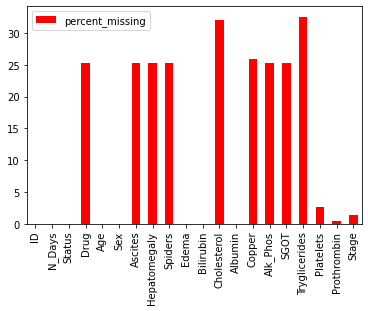

In [153]:
# to get the missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})


#plotting the percentage missing values
import matplotlib.pyplot as plot

missing_value_df.plot(color='red',kind="bar")

<AxesSubplot:>

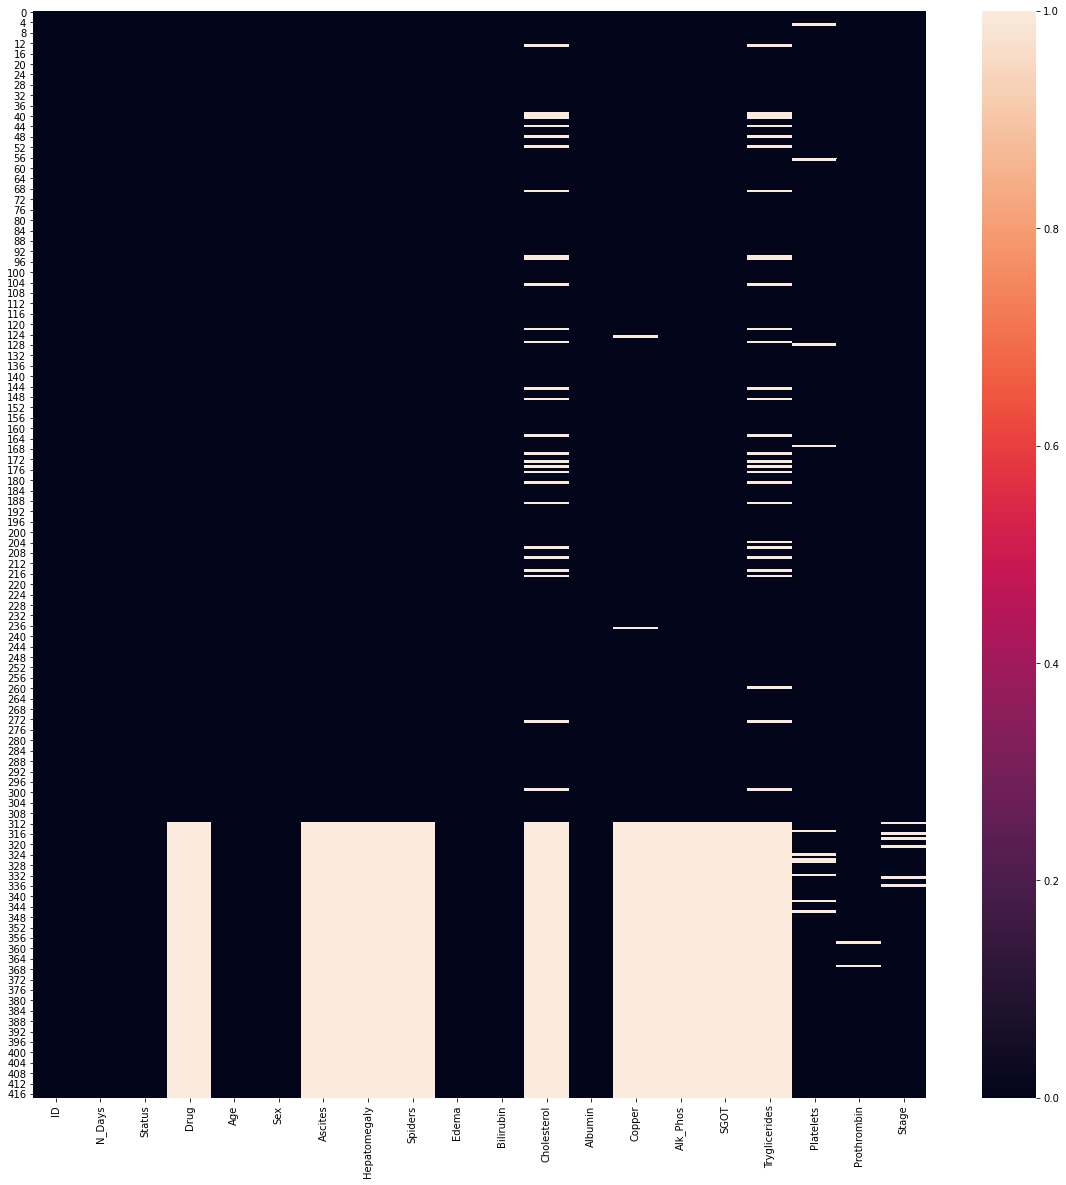

In [154]:
#null values heatmap
plt.figure(figsize=[20,20])
sns.heatmap(df.isnull())

In [155]:
#fixing target index missing values
df[df['Stage'].isnull()].index

Int64Index([312, 316, 318, 321, 333, 336], dtype='int64')

In [156]:
df = df.drop(df[df['Stage'].isnull()].index) 

In [157]:
df.reset_index(drop=True,inplace=True) #reset the index

In [158]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             100
Age                0
Sex                0
Ascites          100
Hepatomegaly     100
Spiders          100
Edema              0
Bilirubin          0
Cholesterol      128
Albumin            0
Copper           102
Alk_Phos         100
SGOT             100
Tryglicerides    130
Platelets         11
Prothrombin        2
Stage              0
dtype: int64

<AxesSubplot:>

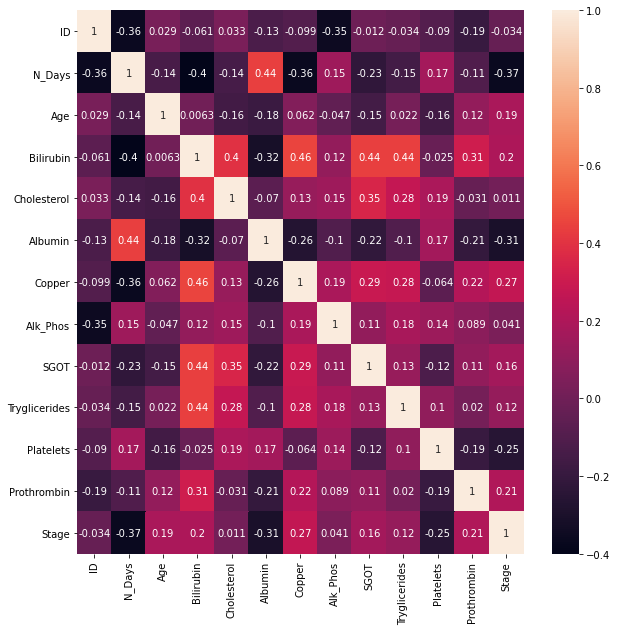

In [159]:
#correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(df_target.corr(), annot=True)  

Index(['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')


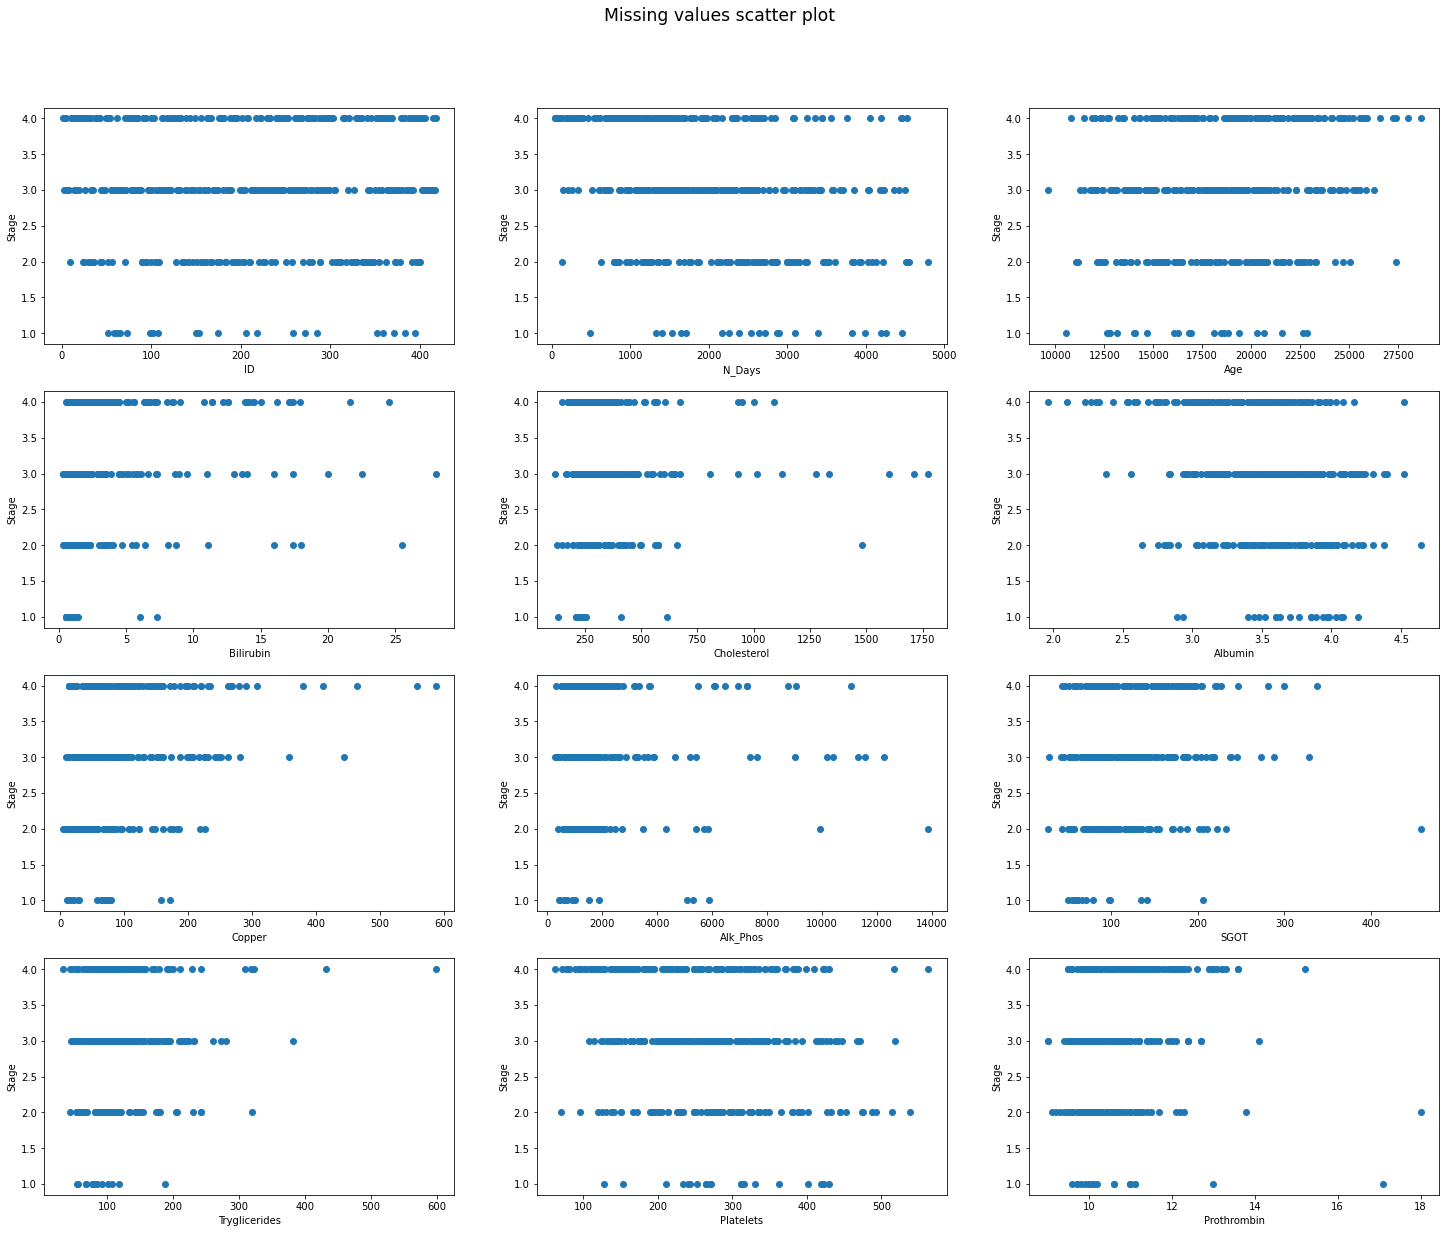

In [160]:

numerical_cols = df.select_dtypes(["float64","int64"])
print(numerical_cols.columns)

fig, axes = plt.subplots(4,3,figsize = (25,20))
fig.suptitle('Missing values scatter plot',y = 0.95, size = "xx-large")
for feature,subplot in zip(numerical_cols.columns, axes.flatten()):
    #print(auto_mpg_X[feature],auto_mpg_y)
    subplot.scatter(x=df_target[feature],y=df_target['Stage']);
    subplot.set(ylabel="Stage", xlabel=feature)
plt.show()

**We can fill the numerical values with the MEDIAN values and categorical values with the MODE values**

In [161]:
categorical_cols = df.select_dtypes(["object"])
print(categorical_cols.columns)

Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')


In [162]:
#converting age 
df["Age"] = (df["Age"]/365)

In [163]:
#handling the missing values

for col in categorical_cols.columns:
    df[col].fillna(df[col].mode().values[0], inplace=True)

for col in numerical_cols.columns:
    df[col].fillna(df[col].median(), inplace=True)

In [164]:
df.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [165]:
df['Stage'].value_counts()

3.0    155
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64

Text(0.5, 1.0, 'Number of Example Per Class')

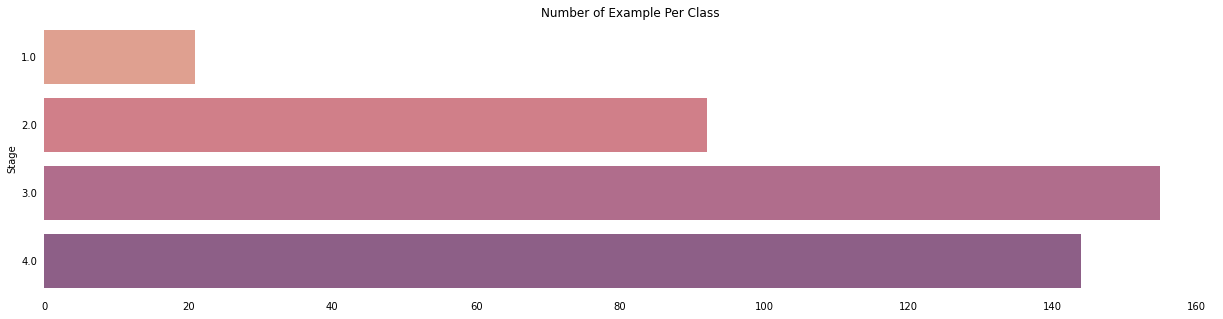

In [166]:
plt.figure(figsize=(21,5))
sns.countplot(y=df['Stage'], palette="flare", alpha=0.8, )
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Number of Example Per Class')

**We can see some imbalances in our dataset. In our case we need to predict cirrhosis and no cirrhosis. Therefore we will modify the dataset**

In [167]:
# Converting Target categories into intigers 1 for Cirrhosis, 0 otherwise
df['Stage'] = np.where(df['Stage'] == 4,1,0)

"\nplt.subplot(3,1,1)\nsns.countplot(x=df['Stage'], hue=df['Status'], palette='Purples', alpha=0.9)\nsns.despine(top=True, right=True, bottom=True, left=True)\nplt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)\nplt.xlabel('')\nplt.title('Status');\n"

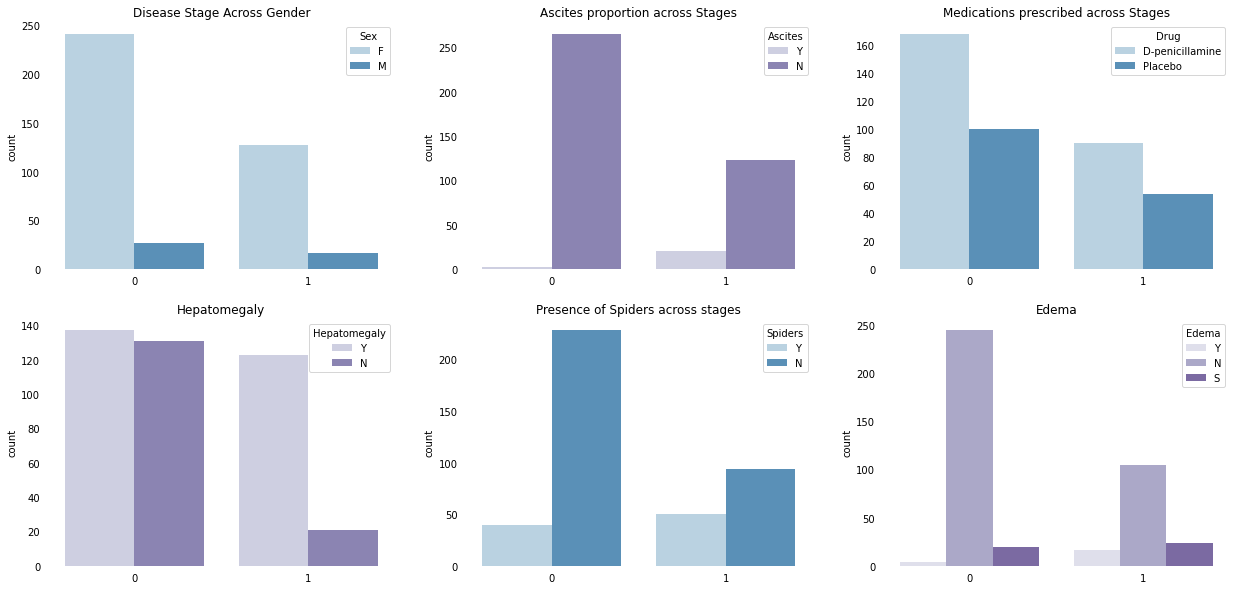

In [168]:
# exploring the relations between categorical columns and the target variable
plt.figure(figsize=(21.2,10))

plt.subplot(2,3,1)
sns.countplot(x=df['Stage'], hue=df['Sex'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Disease Stage Across Gender')

plt.subplot(2,3,2)
sns.countplot(x=df['Stage'], hue=df['Ascites'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Ascites proportion across Stages')

plt.subplot(2,3,3)
sns.countplot(x=df['Stage'], hue=df['Drug'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Medications prescribed across Stages');

plt.subplot(2,3,4)
sns.countplot(x=df['Stage'], hue=df['Hepatomegaly'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Hepatomegaly');

plt.subplot(2,3,5)
sns.countplot(x=df['Stage'], hue=df['Spiders'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Presence of Spiders across stages');

plt.subplot(2,3,6)
sns.countplot(x=df['Stage'], hue=df['Edema'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Edema');

'''
plt.subplot(3,1,1)
sns.countplot(x=df['Stage'], hue=df['Status'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Status');
'''

In [169]:
def plot_object(obj_col_list):
    c=1
    for i in obj_col_list:
        plt.subplot(3,3,c)
        sns.countplot(x=df['Stage'], hue=df[i], palette='Blues', alpha=0.9)
        sns.despine(top=True, right=True, bottom=True, left=True)
#         plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
        plt.xlabel('')
        plt.title(i)
        c+=1
    return plt
    

<module 'matplotlib.pyplot' from '/Users/gaurav/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

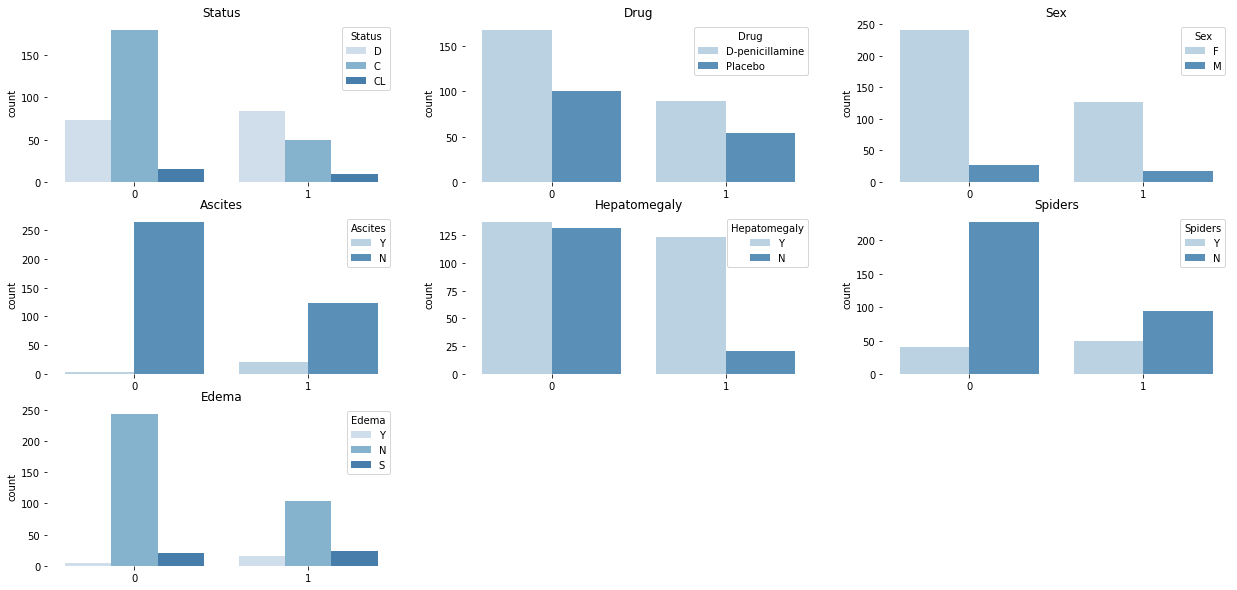

In [170]:
plt.figure(figsize=(21.2,10))
plot_object(categorical_cols.columns)

**There are some interesting insights if we observe closely. Take the case at Ascites, we observe that the rist of disease is higher with increase in Ascites. also presence of spiders has a positive relation with disease risk.**

In [171]:
def plot_num(num_col_list):
    c=1
    for i in num_col_list:
        plt.subplot(3,5,c)
        sns.kdeplot(x=df[i], hue=df['Stage'], fill=True, palette='RdBu', common_norm=True)
        sns.despine(top=True, right=True, bottom=True, left=True)
#         plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
        plt.xlabel('')
        plt.title(i)
        c+=1
    return plt

<module 'matplotlib.pyplot' from '/Users/gaurav/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

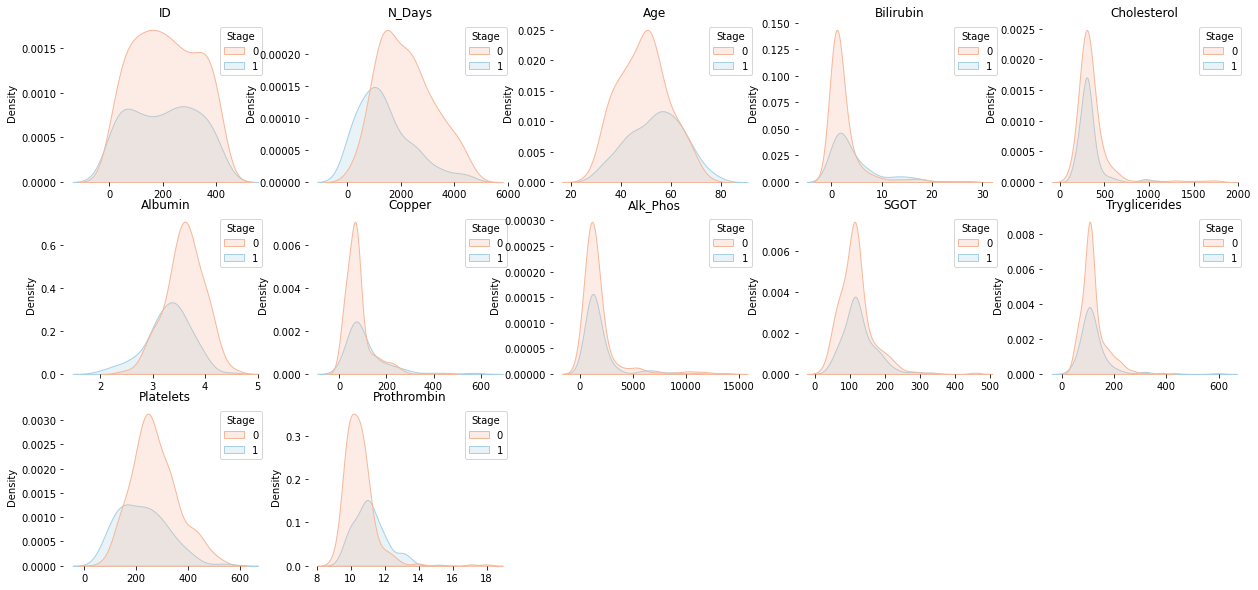

In [172]:
plt.figure(figsize=(21.2,10))
plot_num(numerical_cols.columns[:-1])

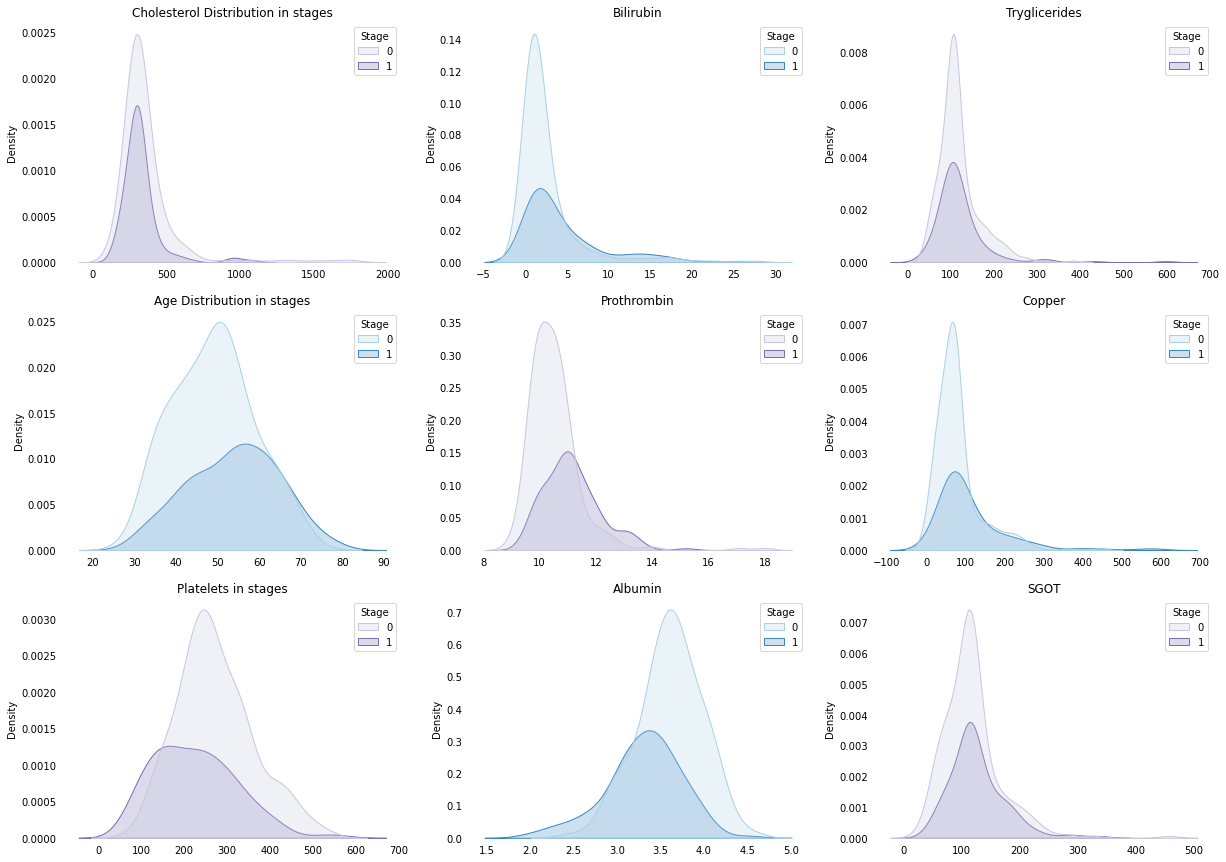

In [173]:
plt.figure(figsize=(20.6,15))

plt.subplot(3,3,1)
sns.kdeplot(df['Cholesterol'], hue=df['Stage'], fill=True, palette='Purples')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Cholesterol Distribution in stages');

plt.subplot(3,3,2)
sns.kdeplot(df['Bilirubin'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Bilirubin');

plt.subplot(3,3,3)
sns.kdeplot(df['Tryglicerides'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Tryglicerides');

plt.subplot(3,3,4)
sns.kdeplot(df['Age'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Age Distribution in stages');

plt.subplot(3,3,5)
sns.kdeplot(df['Prothrombin'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Prothrombin');

plt.subplot(3,3,6)
sns.kdeplot(df['Copper'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Copper');

plt.subplot(3,3,7)
sns.kdeplot(df['Platelets'], hue=df['Stage'], fill=True, palette='Purples')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Platelets in stages');

plt.subplot(3,3,8)
sns.kdeplot(df['Albumin'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Albumin');

plt.subplot(3,3,9)
sns.kdeplot(df['SGOT'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('SGOT');

The above feature distribution we can observe that in features such as Age, Prothrombin, Copper the risk of the disease increase with increase in feature value, thus having a positive co-relation on with the disease probability

In [174]:
def plot_reg(num_col_list):
    c=1
    for i in num_col_list:
        plt.subplot(3,5,c)
        sns.regplot(x=df[i], y=df['Stage'], scatter=False, logistic=True, color='royalblue')
        sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
#       plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
        plt.xlabel('')
        plt.title(i)
        c+=1
    return plt

<module 'matplotlib.pyplot' from '/Users/gaurav/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

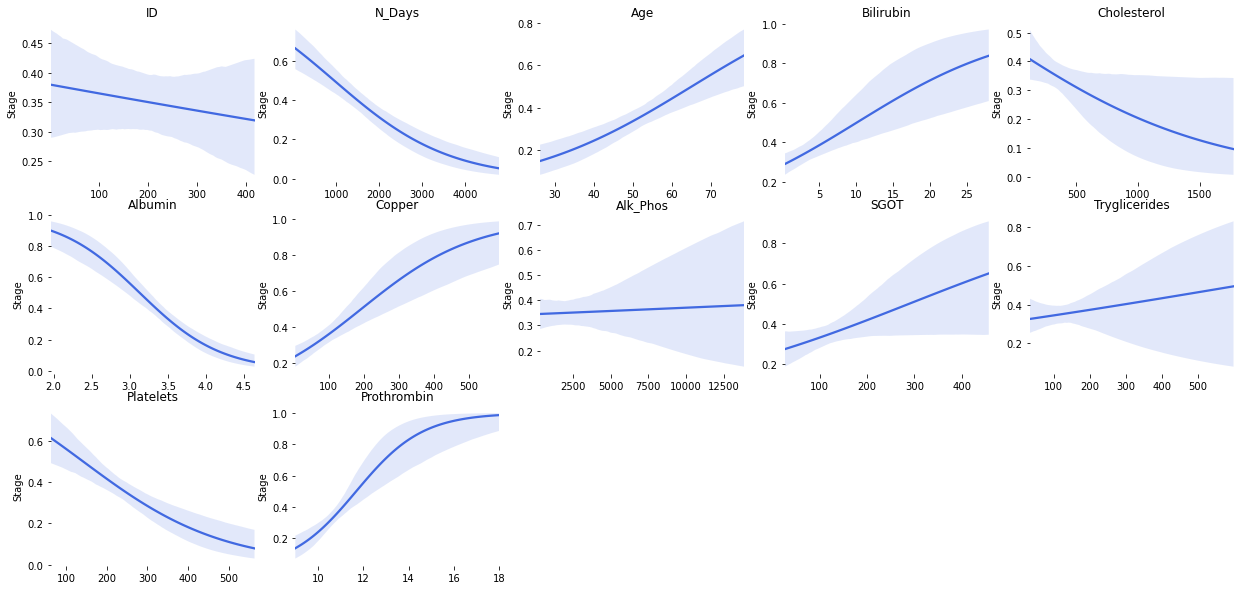

In [175]:
plt.figure(figsize=(21.2,10))
plot_reg(numerical_cols.columns[:-1])

**There are few observations:**
- ID column and N_days numerical column can be neglected as ID is just to find unique patient ID and N_days is causing data leakage
- Status categorical column will also cause the data leakage, hence we can neglect it.


In [176]:
# encoding the categorical columns to numerical columns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in categorical_cols.columns:
    df[col] = le.fit_transform(df[col])

print(df.head().T)


                         0            1            2            3            4
ID                1.000000     2.000000     3.000000     4.000000     5.000000
N_Days          400.000000  4500.000000  1012.000000  1925.000000  1504.000000
Status            2.000000     0.000000     2.000000     2.000000     1.000000
Drug              0.000000     0.000000     0.000000     0.000000     1.000000
Age              58.805479    56.484932    70.120548    54.778082    38.131507
Sex               0.000000     0.000000     1.000000     0.000000     0.000000
Ascites           1.000000     0.000000     0.000000     0.000000     0.000000
Hepatomegaly      1.000000     1.000000     0.000000     1.000000     1.000000
Spiders           1.000000     1.000000     0.000000     1.000000     1.000000
Edema             2.000000     0.000000     1.000000     1.000000     0.000000
Bilirubin        14.500000     1.100000     1.400000     1.800000     3.400000
Cholesterol     261.000000   302.000000   176.000000

In [177]:
y=df['Stage']
X=df.drop(columns=['ID','N_Days','Stage'])

print(X.head())
print(y.head())

   Status  Drug        Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
0       2     0  58.805479    0        1             1        1      2   
1       0     0  56.484932    0        0             1        1      0   
2       2     0  70.120548    1        0             0        0      1   
3       2     0  54.778082    0        0             1        1      1   
4       1     1  38.131507    0        0             1        1      0   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0       14.5        261.0     2.60   156.0    1718.0  137.95          172.0   
1        1.1        302.0     4.14    54.0    7394.8  113.52           88.0   
2        1.4        176.0     3.48   210.0     516.0   96.10           55.0   
3        1.8        244.0     2.54    64.0    6121.8   60.63           92.0   
4        3.4        279.0     3.53   143.0     671.0  113.15           72.0   

   Platelets  Prothrombin  
0      190.0         12.2  
1      221.0         10.

## VISUALIZATIONS

<AxesSubplot:>

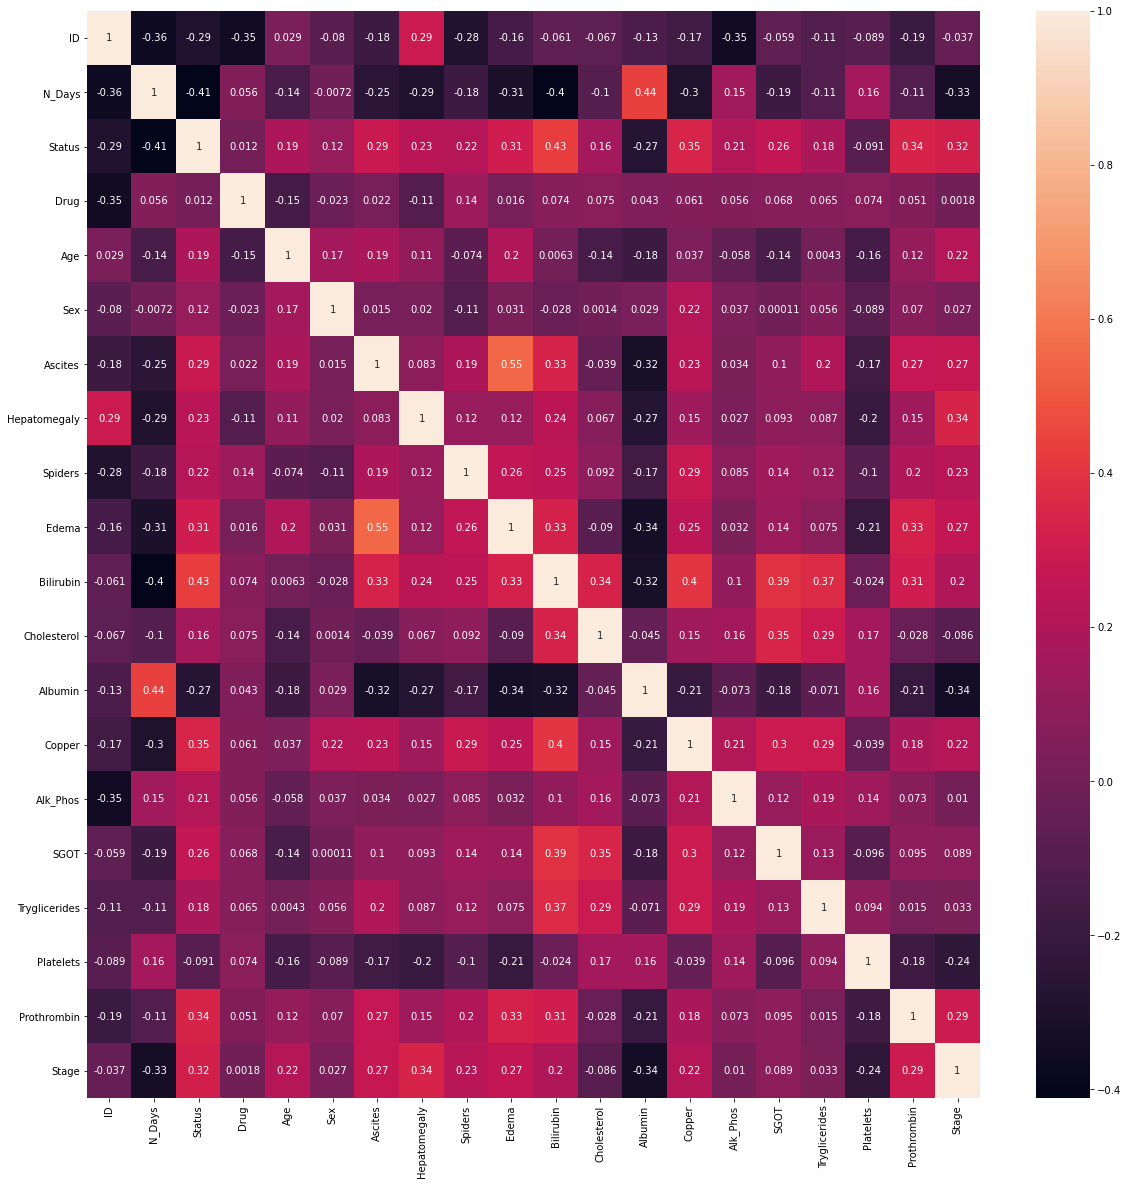

In [181]:
#correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True) 